# Тест №1: Сгущение одного из блоков сетки

In [206]:
%load_ext autoreload
%autoreload 2

from state import State
from domain import Domain
from swe_operators import SweAdvectiveFormOperator
from time_schemes import rk4
from initial_conditions import gaussian_hill, barotropic_instability, geostrophic_balance
import operators as op
from vizualization import trisurf_field, animate_trisurf, surf_interpolated_field, animate_interpolated_surf, \
                          animate_tripcolor, tripcolor_field, imshow_interpolated_field

import numpy as np
import matplotlib.pyplot as plt
from vecmath import calc_mass
from matplotlib           import animation
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
# definition of computational domain constants
RADZ = 6371.22 * 1000.0 # "Earth" radii in meters
GRAV = 9.80616 # "Earth" gravity acceleration in m * s**(-2)
OMEGA = 7.292 * 10**(-5) # "Earth" angular velocity in rad * s**(-1)
PCORI = 2 * OMEGA # Coriolis parameter
H_MEAN = 10 * 1000.0 # "Earth" mean atmosphere depth
C_GRAV = np.sqrt(GRAV * H_MEAN) # Gravity wave speed
LX = 2 * np.pi * RADZ # domain size [0, LX] x [0, LY]
LY = 2 * np.pi * RADZ # domain size [0, LX] x [0, LY]

### 1. Наблюдение за поведением решения
* На блоках с однаковым разрешением
* На блоках с увеличенным разрешением одного из них

In [210]:
%%time
import time
from IPython.display import display, clear_output

domains1 = [Domain(xs = 0.0,    xe = LX / 2, nx = 32, ys = 0.0, ye = LY, ny = 64,  lx=LX, ly=LY), \
           Domain(xs = LX / 2, xe = LX    , nx = 32, ys = 0.0, ye = LY, ny = 64,  lx=LX, ly=LY)]
domains2 = [Domain(xs = 0.0,    xe = LX / 2, nx = 32 * 2, ys = 0.0, ye = LY, ny = 64,  lx=LX, ly=LY), \
           Domain(xs = LX / 2, xe = LX    , nx = 32, ys = 0.0, ye = LY, ny = 64,  lx=LX, ly=LY)]

state1 = gaussian_hill(domains1, H_MEAN)
state2 = gaussian_hill(domains2, H_MEAN)
swe_operator = SweAdvectiveFormOperator(g=GRAV, pcori=0.0, diff_method = op.diff_sbp21)

T = 2 * 24 * 3600
Nt = 2*120
dt = T / Nt

states_list1 = [state1]
states_list2 = [state2]

for k in range(Nt+1):
    clear_output(wait=True)
    display('Time step '+str(k))
    state1 = rk4(state1, swe_operator, dt, domains1)
    state2 = rk4(state2, swe_operator, dt, domains2)
    states_list1.append(state1)
    states_list2.append(state2)
h_list1 = [state1.h for state1 in states_list1]
h_list2 = [state2.h for state2 in states_list2]

'Time step 240'

CPU times: user 7.63 s, sys: 862 ms, total: 8.49 s
Wall time: 8.11 s


<IPython.core.display.Javascript object>


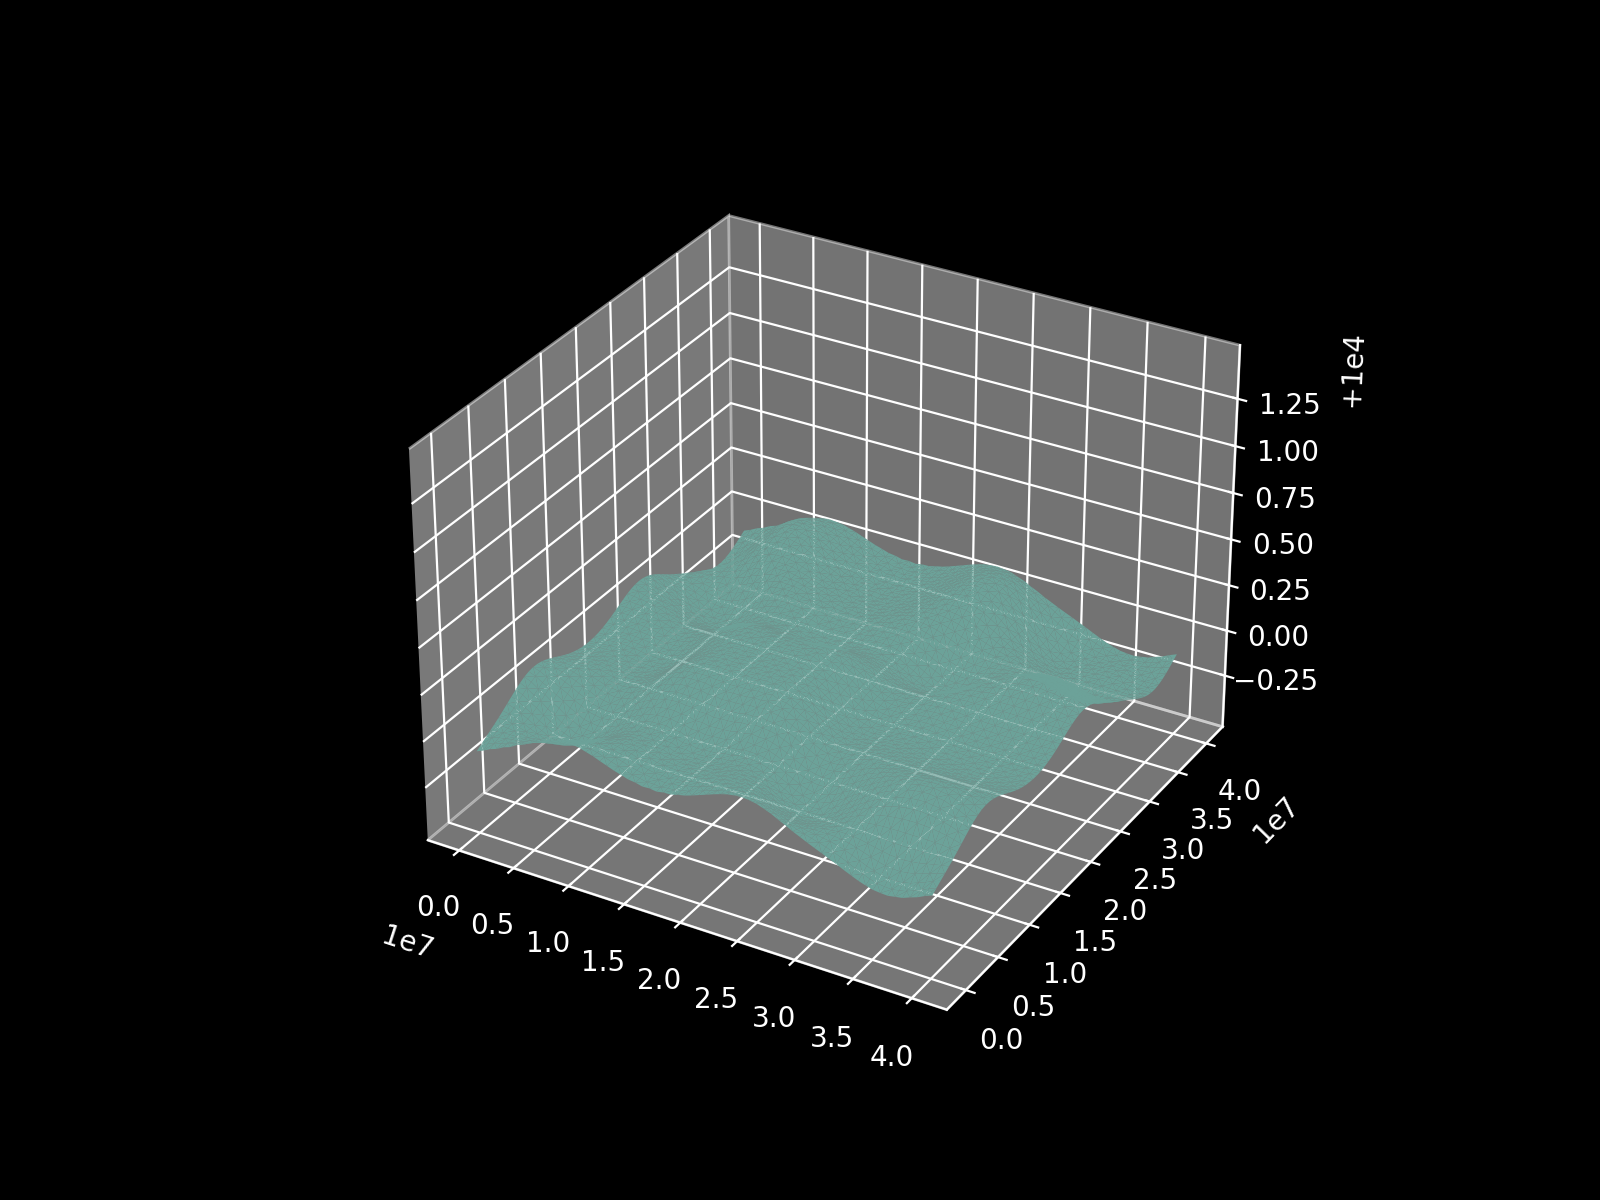

In [214]:
animate_trisurf(h_list1, domains1, 1)

l-max норма ошибки на правом блоке:  0.020045331402798183
l-max норма ошибки на левом блоке:  0.021925077107880497


<IPython.core.display.Javascript object>


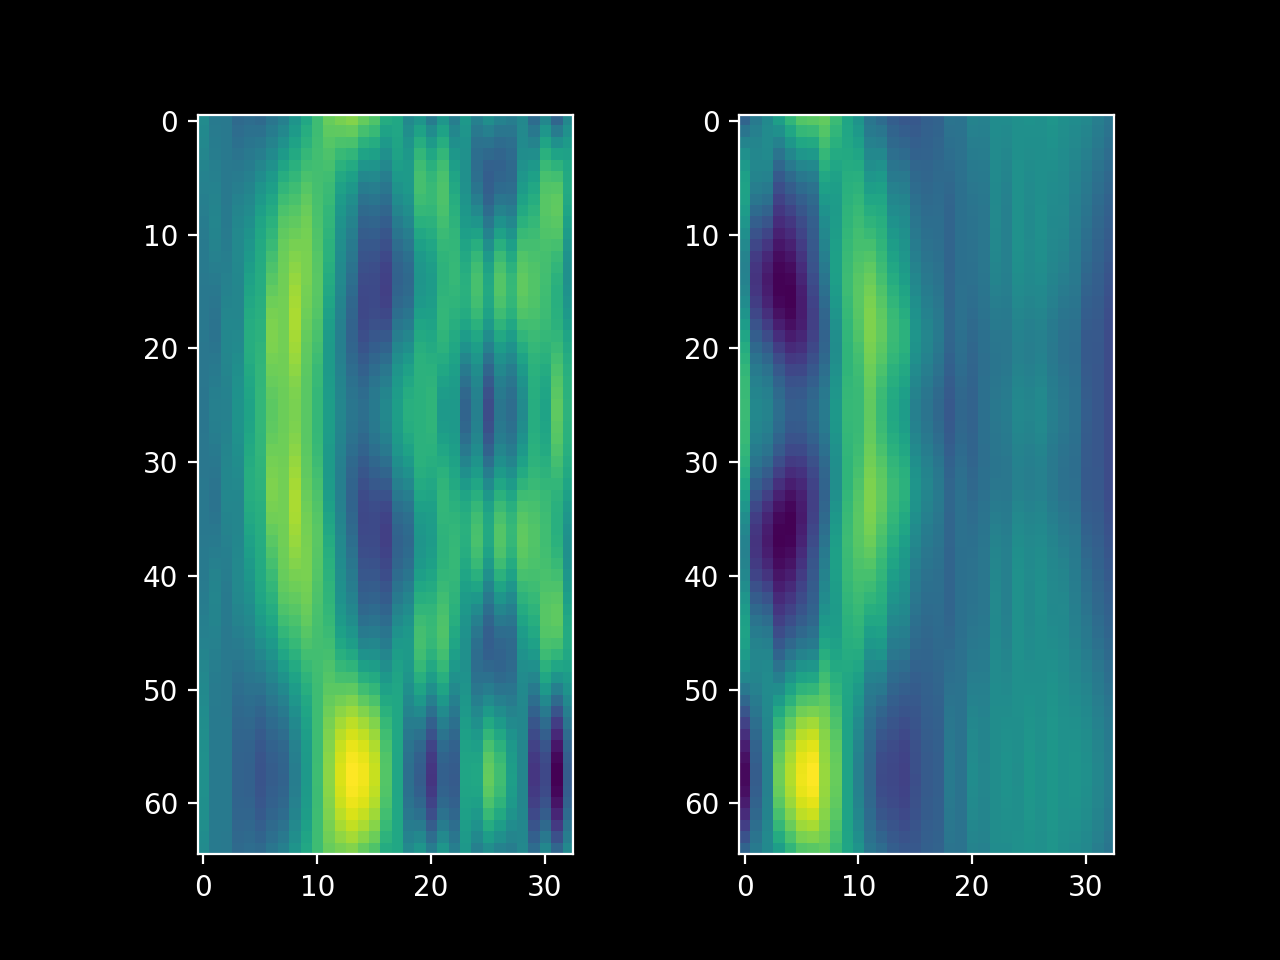

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [219]:
later_time = -1
h1l = np.array(h_list1[later_time][0])
h2l = np.array(h_list2[later_time][0])
h1r = np.array(h_list1[later_time][1])
h2r = np.array(h_list2[later_time][1])
error_right = np.matrix(h1r - h2r)
error_left  = np.matrix(h1l - h2l[:,::2])

print('l-max норма ошибки на правом блоке: ', np.amax(error_right))
print('l-max норма ошибки на левом блоке: ',  np.amax(error_left))

plt.subplot(1, 2, 1)
plt.imshow(error_left, label = 'left block error')
plt.subplot(1, 2, 2)
plt.imshow(error_right, label = 'right block error')
plt.legend